In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import json

In [9]:
df = pd.read_csv("../data/EURUSD_with_signals.csv", parse_dates=["datetime"])

In [10]:
combos = {
    "C1": ["rsi", "ema_50", "bb_bandwidth"],
    "C2": ["macd_diff", "ema_50", "<TICKVOL>"],
    "C3": ["stoch_k", "bb_bandwidth", "<TICKVOL>"],
    "C4": ["macd_diff", "atr", "<TICKVOL>"],
    "C5": ["rsi", "ema_50", "<TICKVOL>"],
    "C6": ["stoch_k", "ema_50", "bb_bandwidth"],
    "C7": ["macd_diff", "bb_bandwidth"],
    "C8": ["ema_50", "ema_100"],
    "C9": ["ema_20", "ema_50"],
    "C10": ["bb_bandwidth", "rsi", "stoch_k"],
    "C11": ["macd_diff", "rsi", "atr"],
    "C12": ["stoch_k", "rsi", "<TICKVOL>"],
    "C13": ["macd_diff", "ema_50", "bb_bandwidth"],
    "C14": ["bb_upper", "rsi"],
    "C15": ["bb_lower", "rsi"],
    "C16": ["macd", "macd_signal"]
}


In [11]:
indicators = list(set(itertools.chain.from_iterable(combos.values())))
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[indicators] = scaler.fit_transform(df_scaled[indicators])


üìä ŒüœÄœÑŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑ C1: ['rsi', 'ema_50', 'bb_bandwidth']


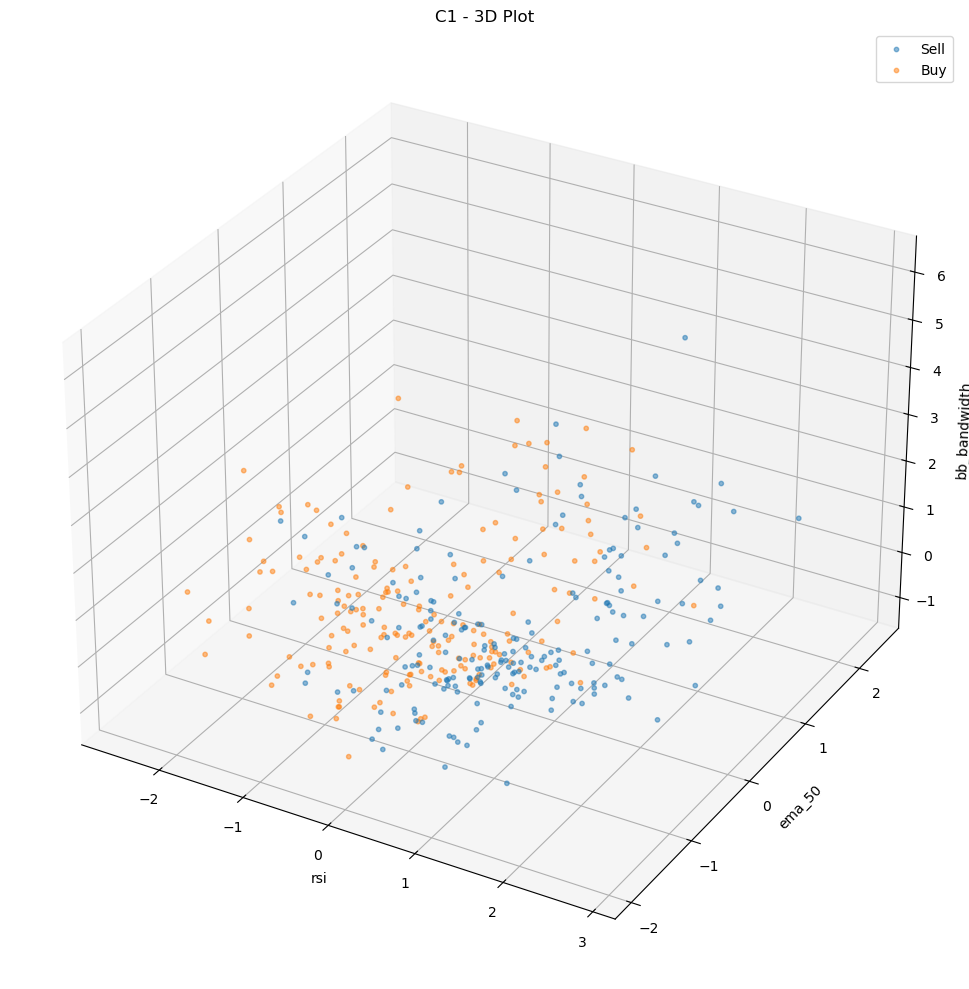


üìä ŒüœÄœÑŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑ C2: ['macd_diff', 'ema_50', '<TICKVOL>']


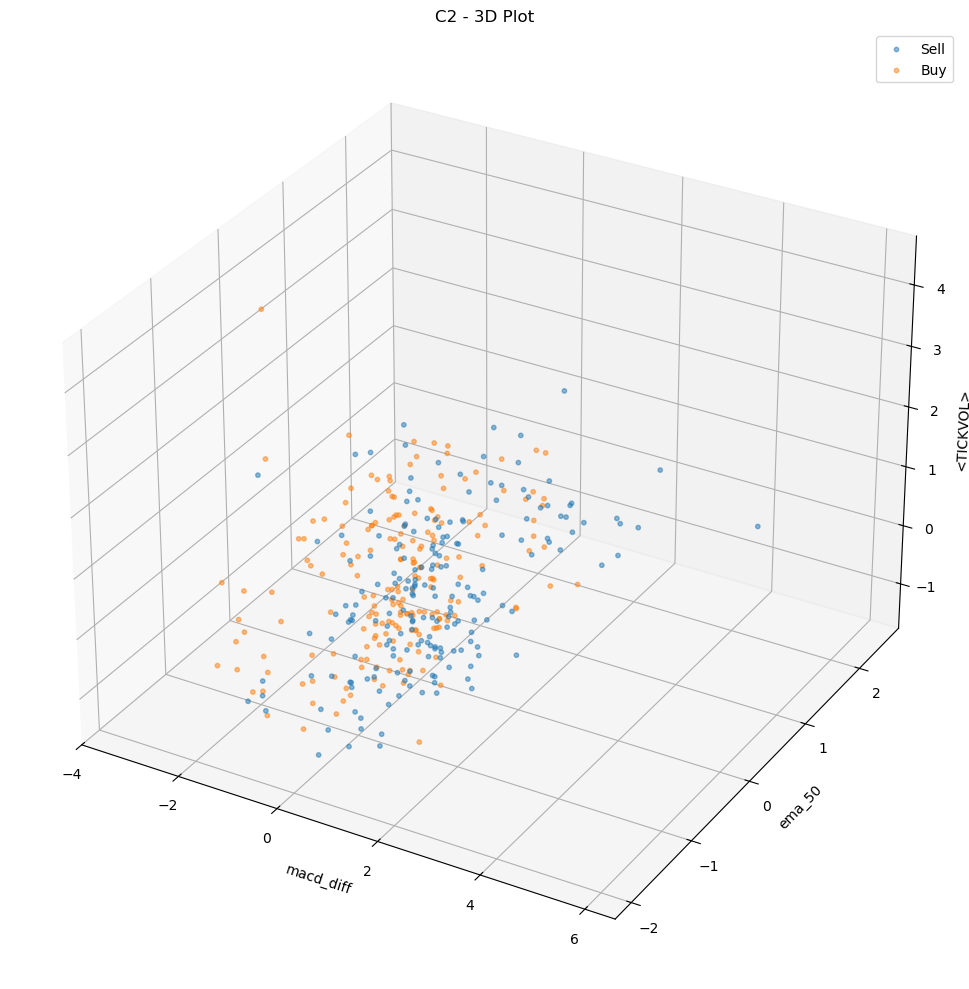


üìä ŒüœÄœÑŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑ C3: ['stoch_k', 'bb_bandwidth', '<TICKVOL>']


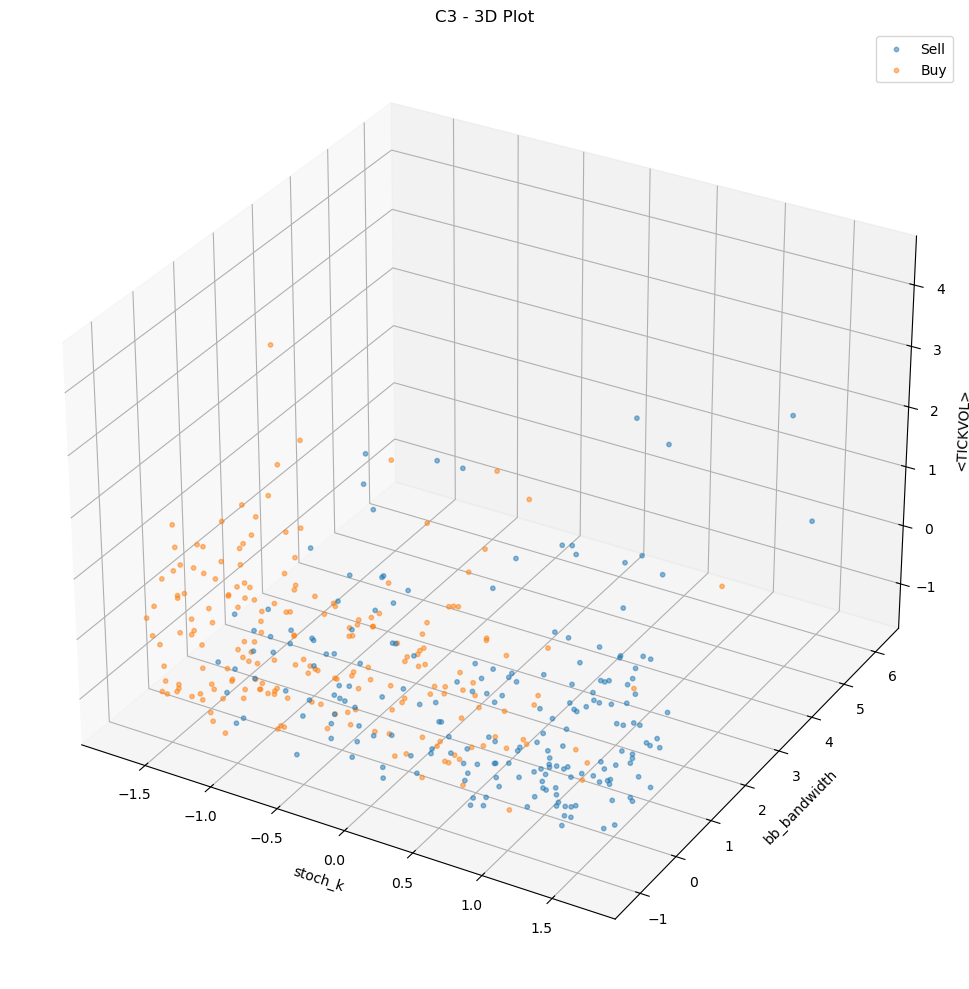


üìä ŒüœÄœÑŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑ C4: ['macd_diff', 'atr', '<TICKVOL>']


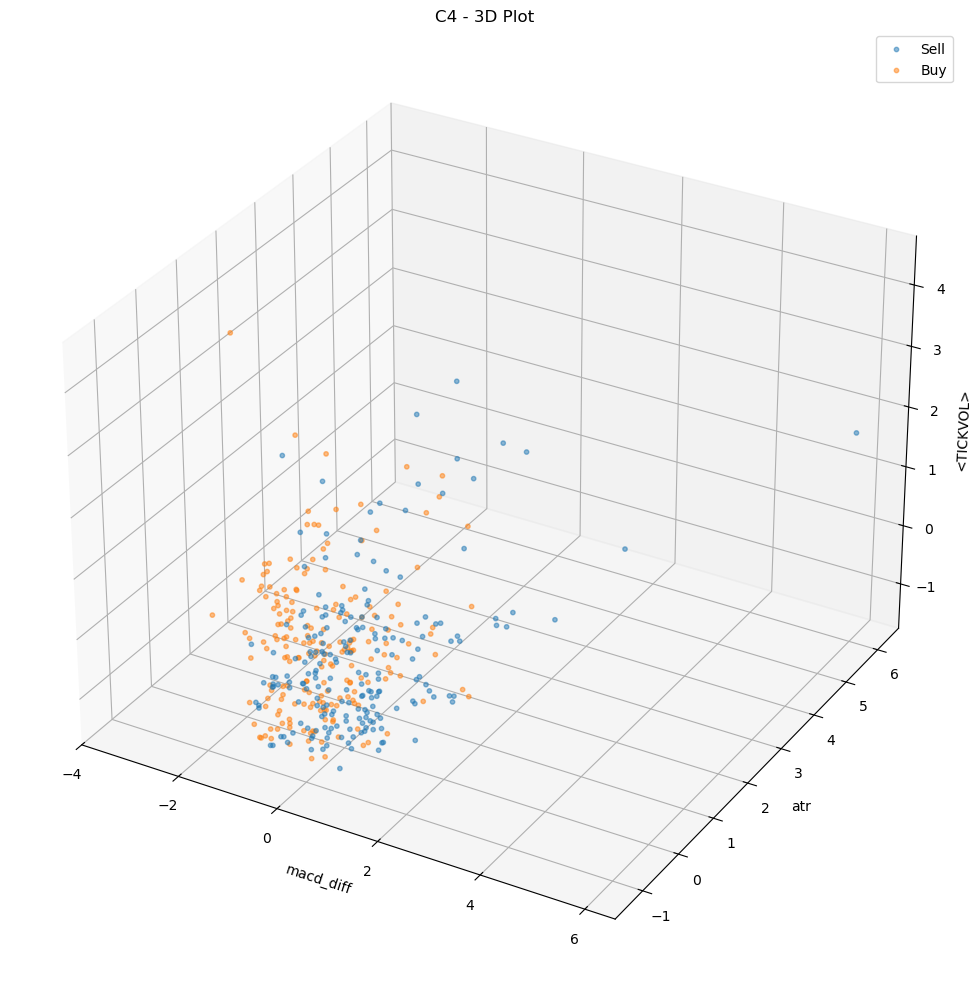


üìä ŒüœÄœÑŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑ C5: ['rsi', 'ema_50', '<TICKVOL>']


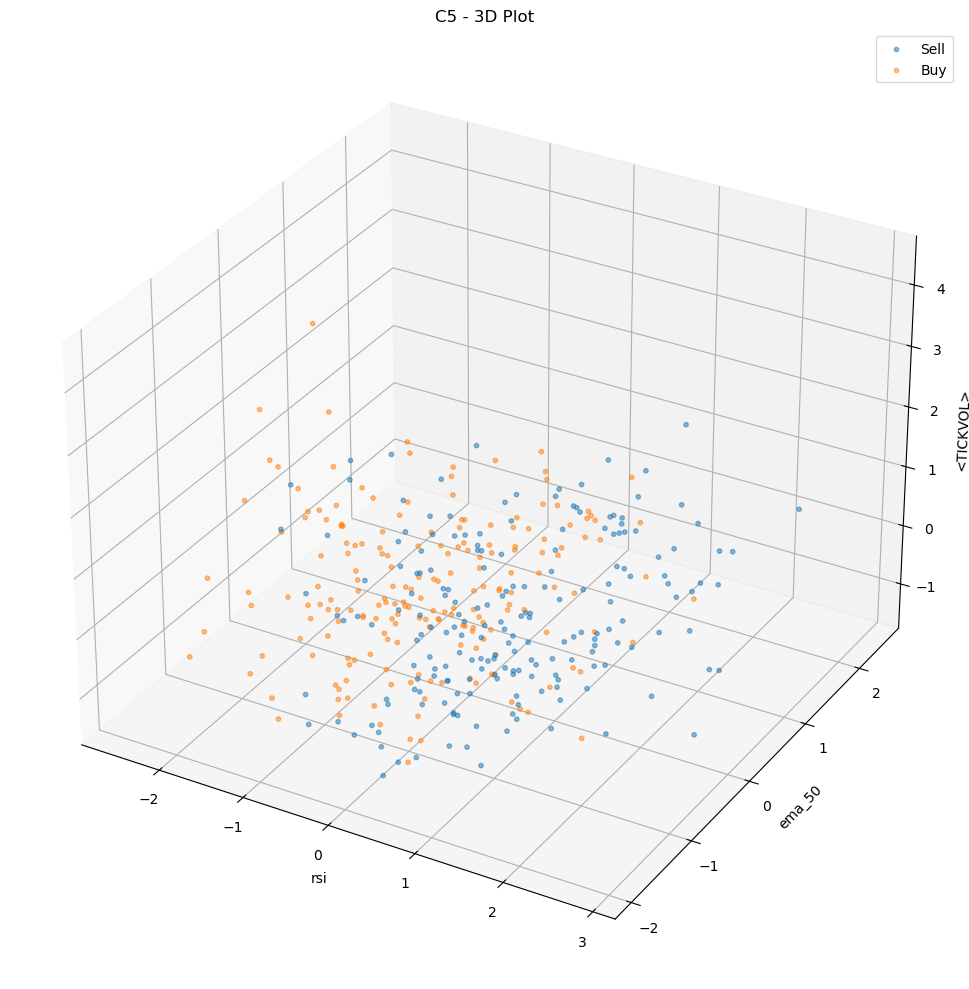


üìä ŒüœÄœÑŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑ C6: ['stoch_k', 'ema_50', 'bb_bandwidth']


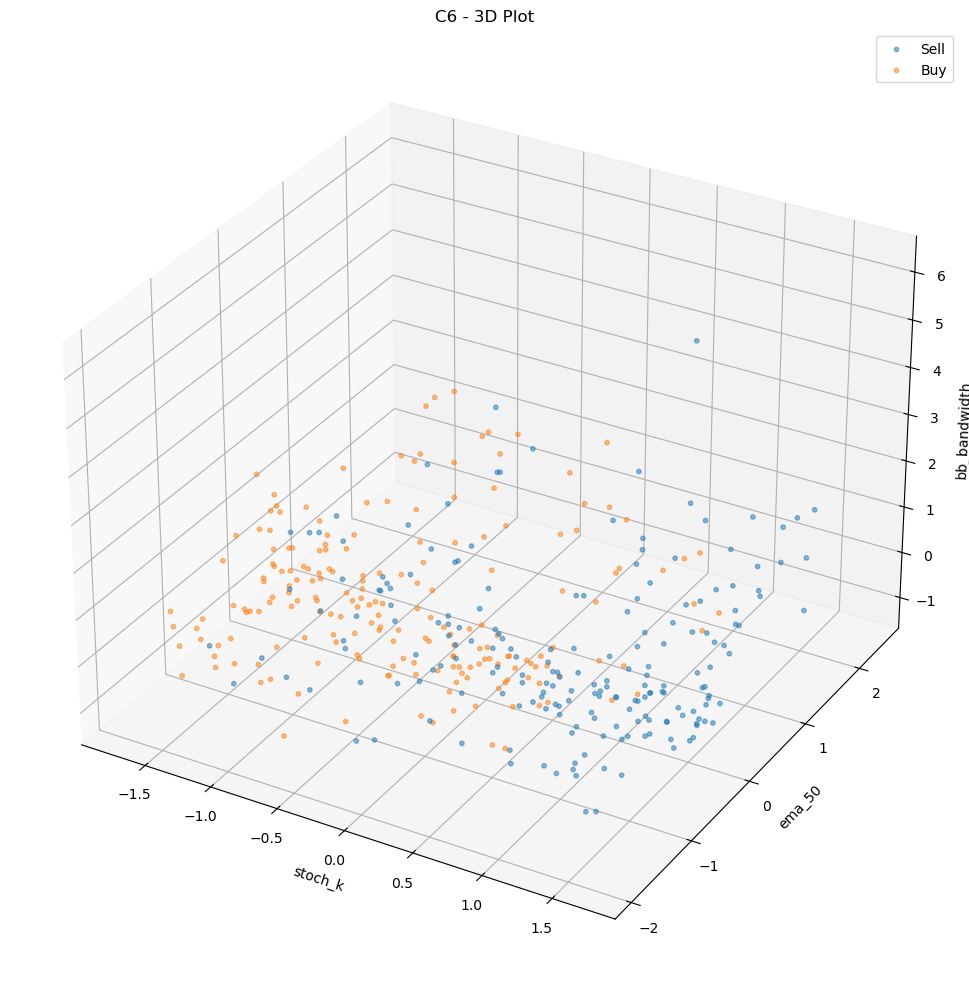


üìä ŒüœÄœÑŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑ C7: ['macd_diff', 'bb_bandwidth']


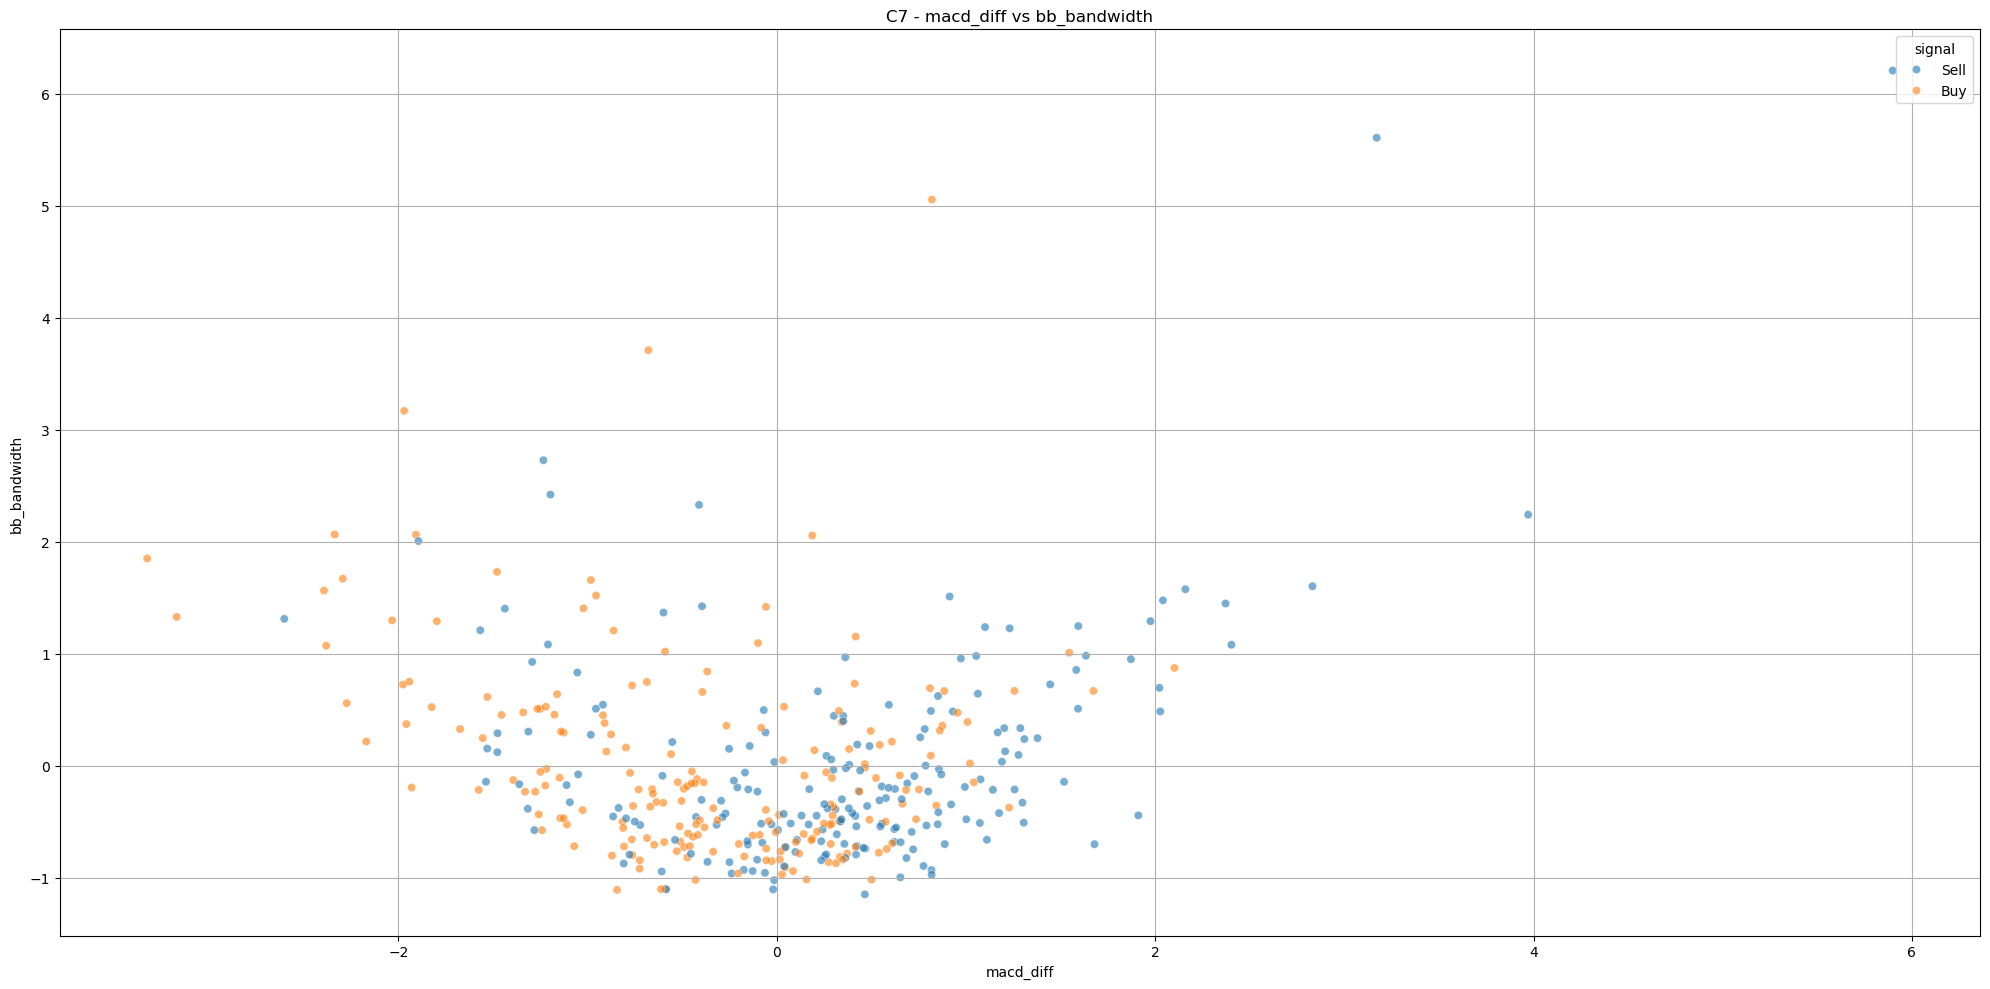


üìä ŒüœÄœÑŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑ C8: ['ema_50', 'ema_100']


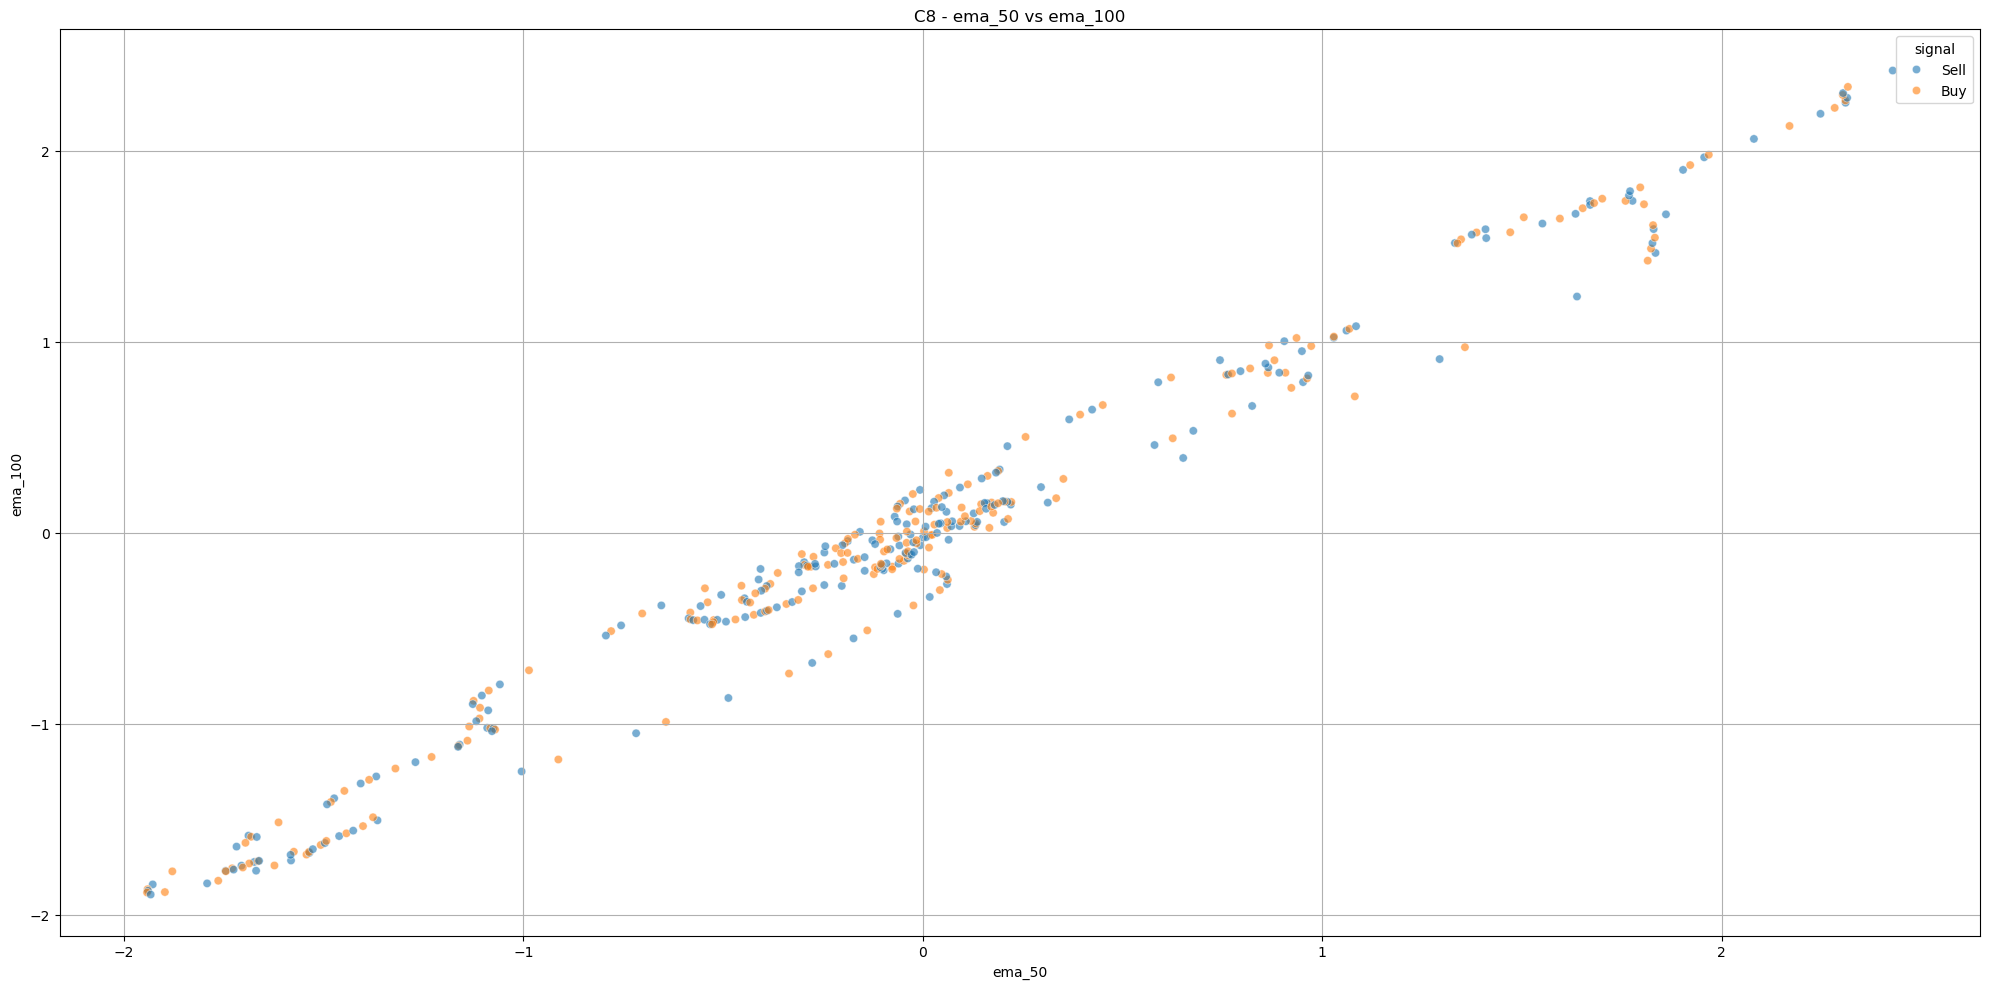


üìä ŒüœÄœÑŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑ C9: ['ema_20', 'ema_50']


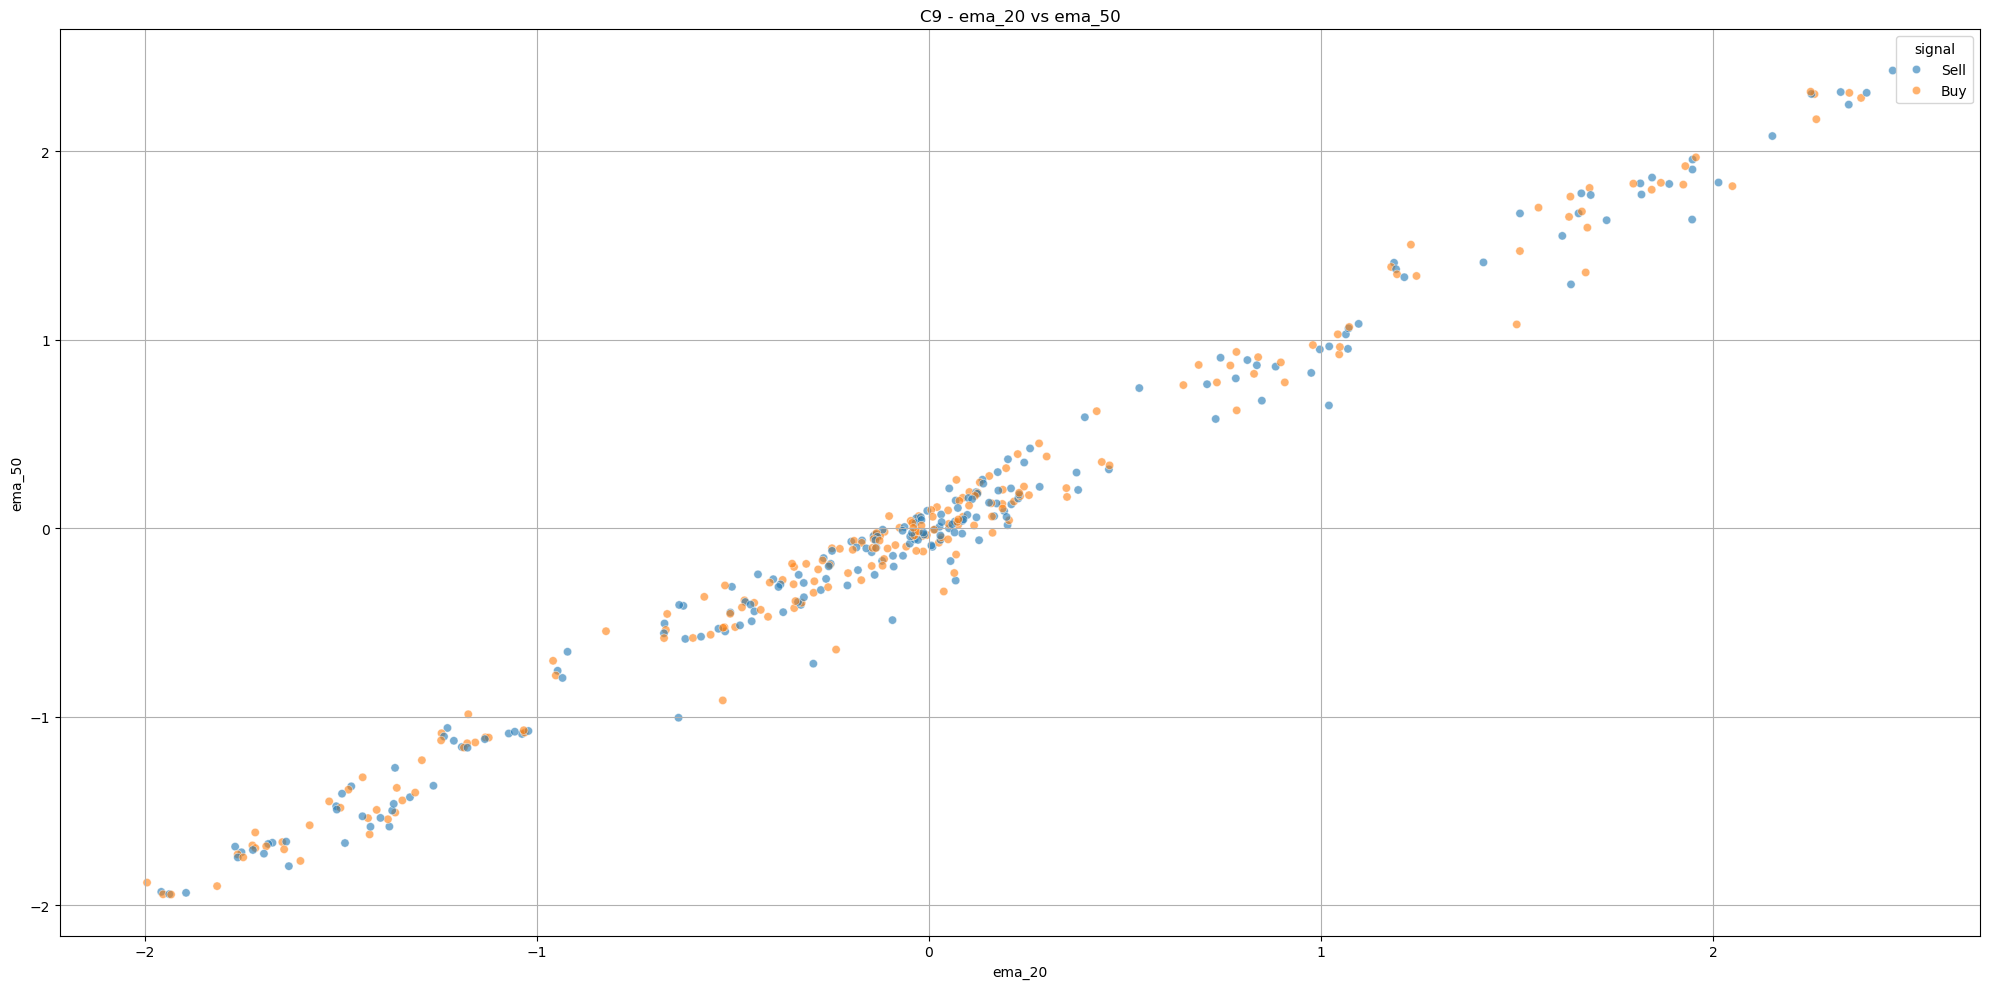


üìä ŒüœÄœÑŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑ C10: ['bb_bandwidth', 'rsi', 'stoch_k']


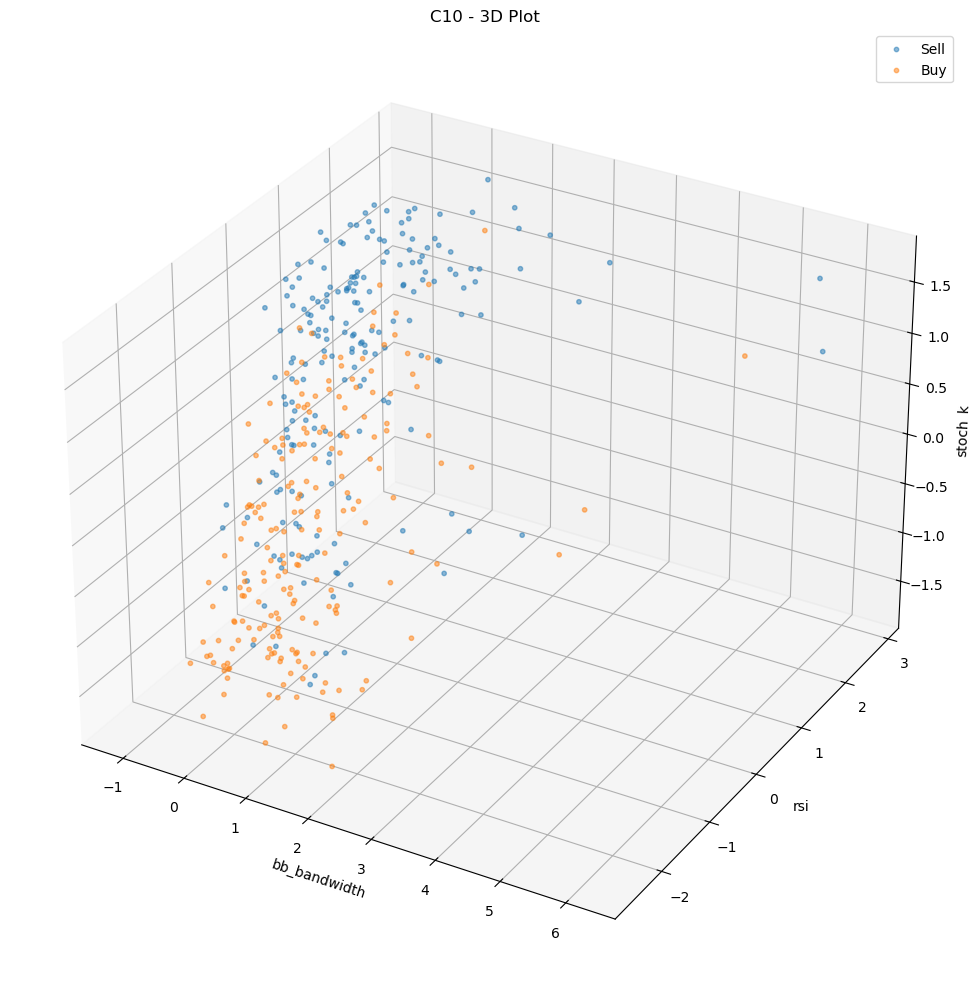


üìä ŒüœÄœÑŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑ C11: ['macd_diff', 'rsi', 'atr']


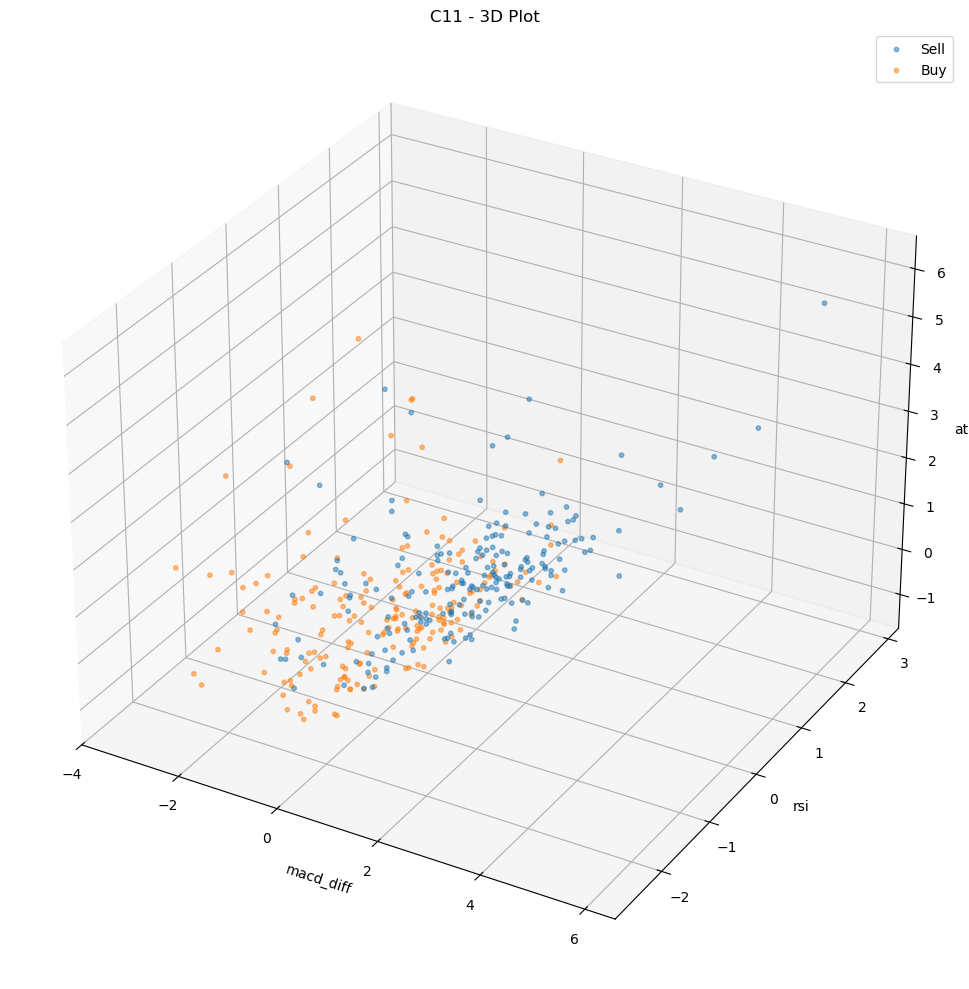


üìä ŒüœÄœÑŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑ C12: ['stoch_k', 'rsi', '<TICKVOL>']


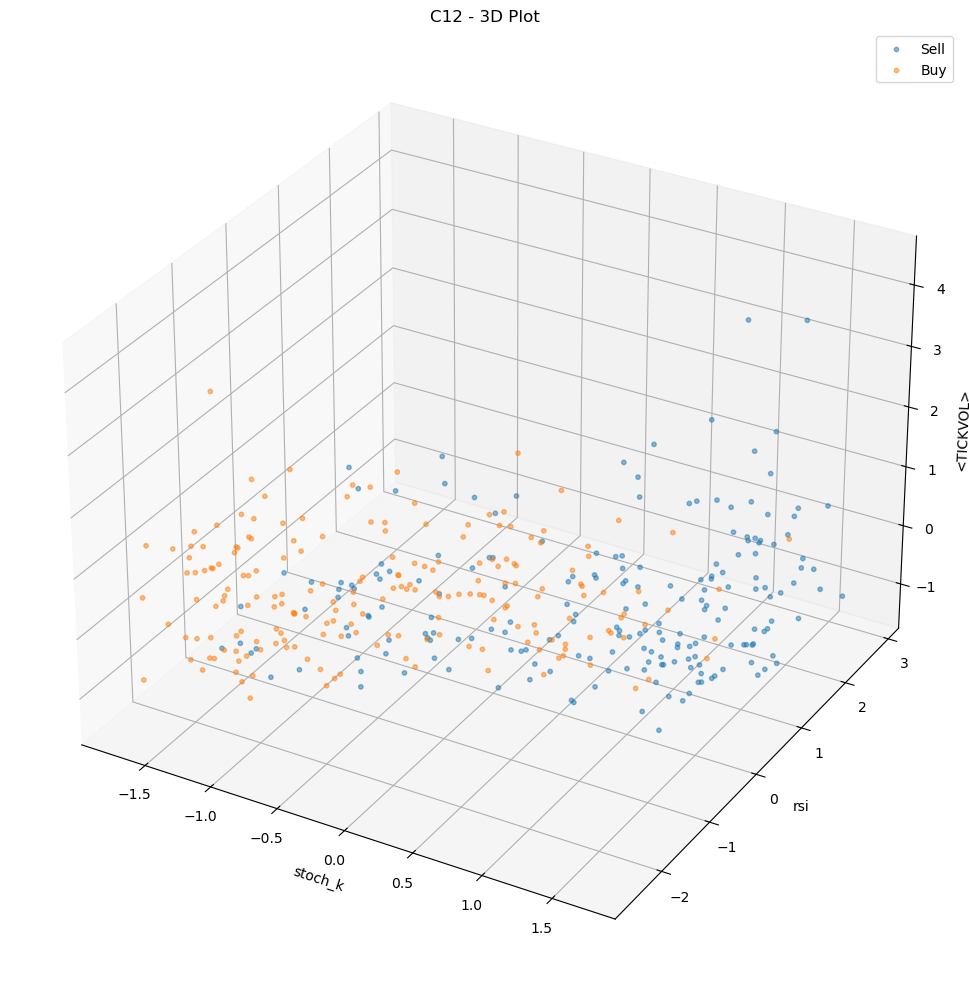


üìä ŒüœÄœÑŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑ C13: ['macd_diff', 'ema_50', 'bb_bandwidth']


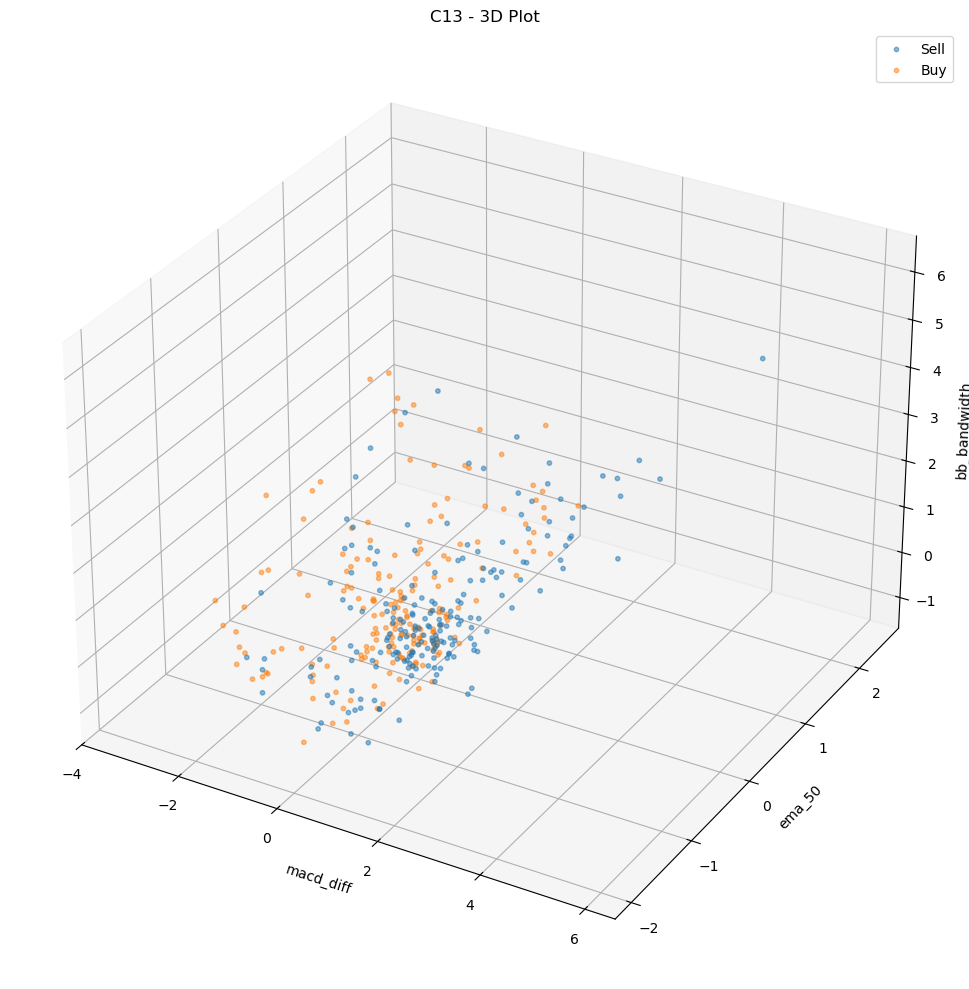


üìä ŒüœÄœÑŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑ C14: ['bb_upper', 'rsi']


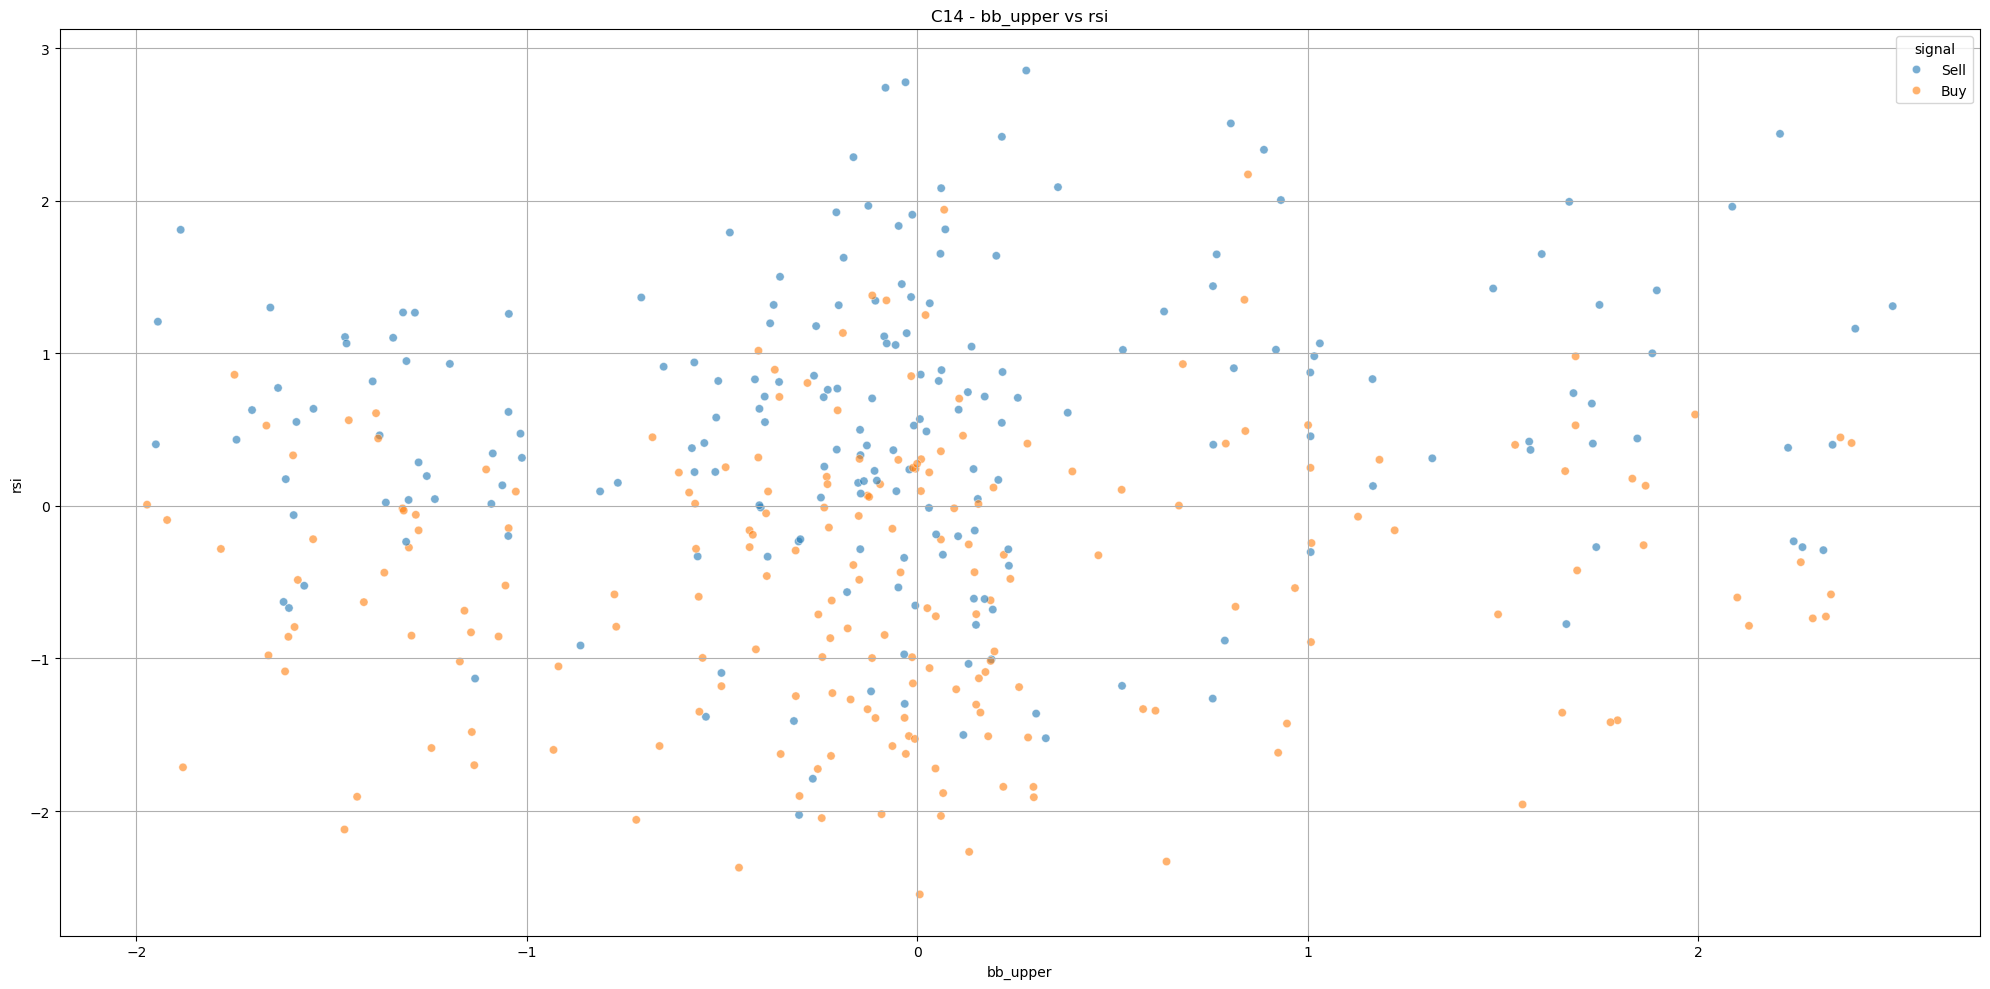


üìä ŒüœÄœÑŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑ C15: ['bb_lower', 'rsi']


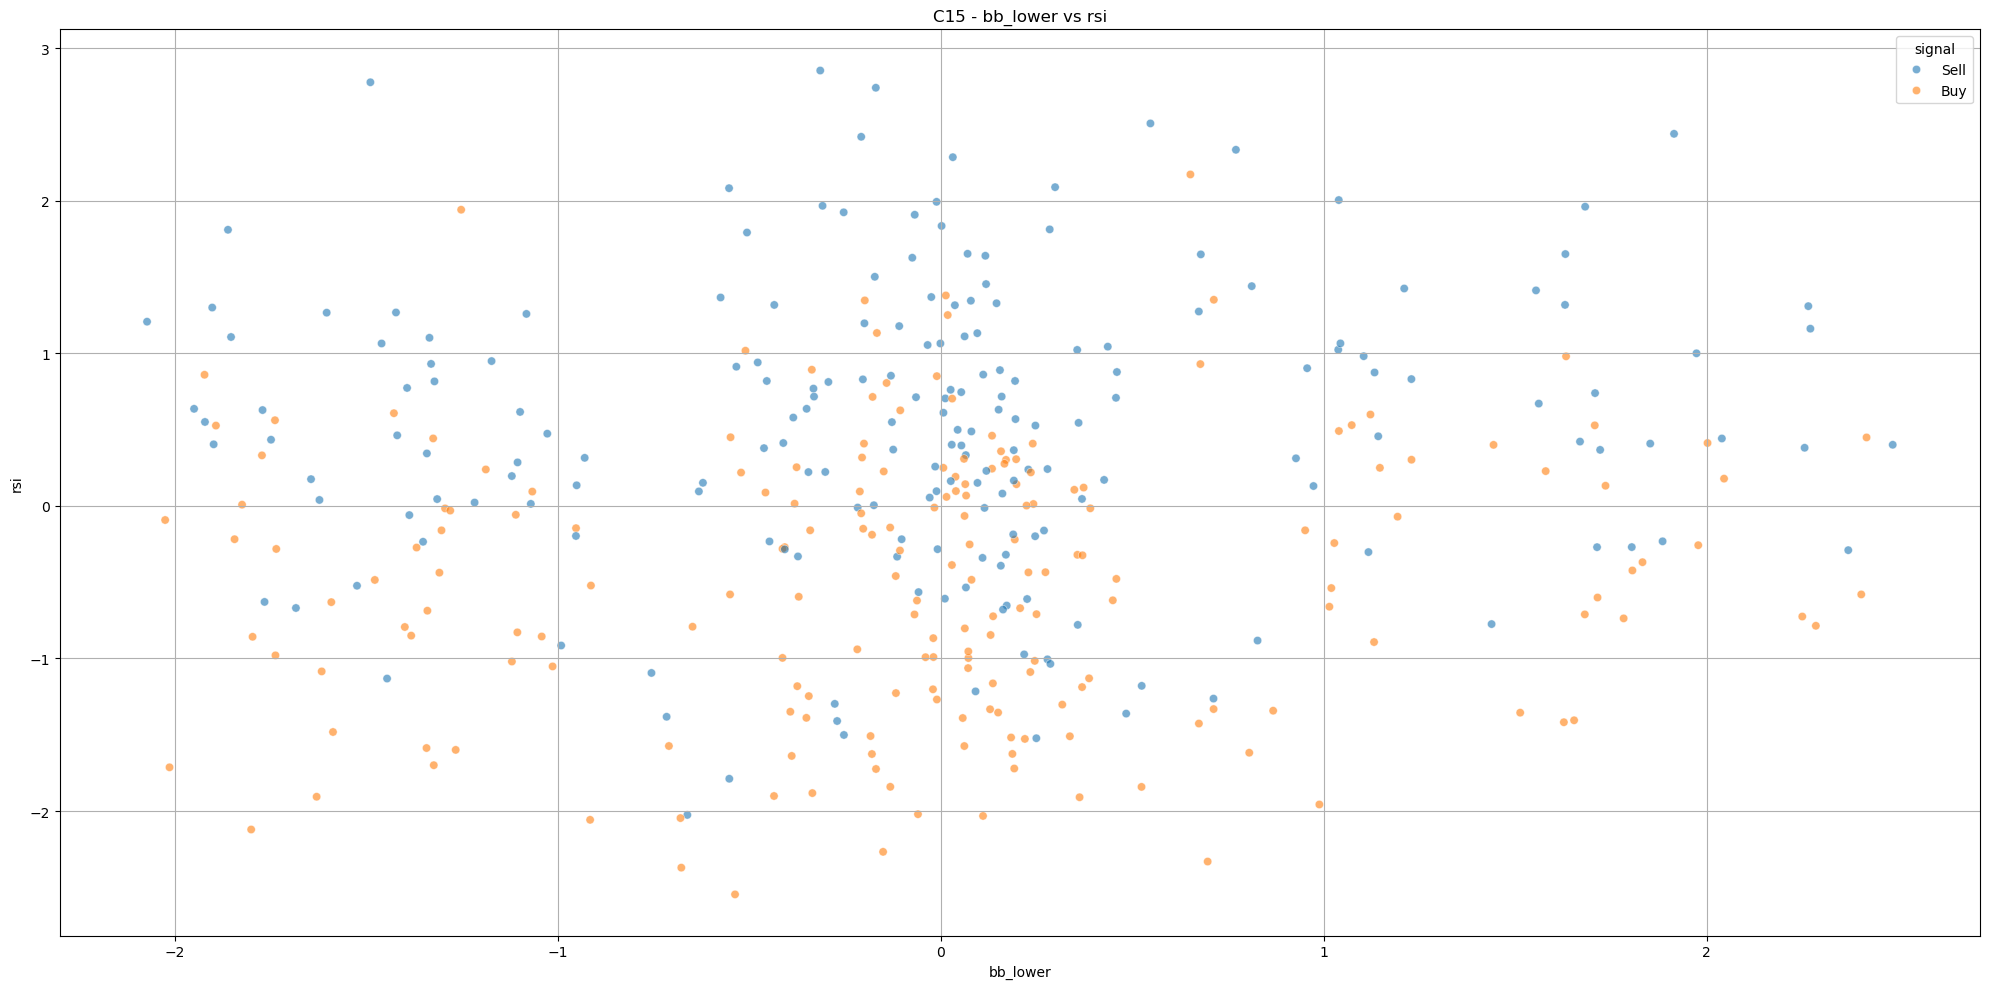


üìä ŒüœÄœÑŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑ C16: ['macd', 'macd_signal']


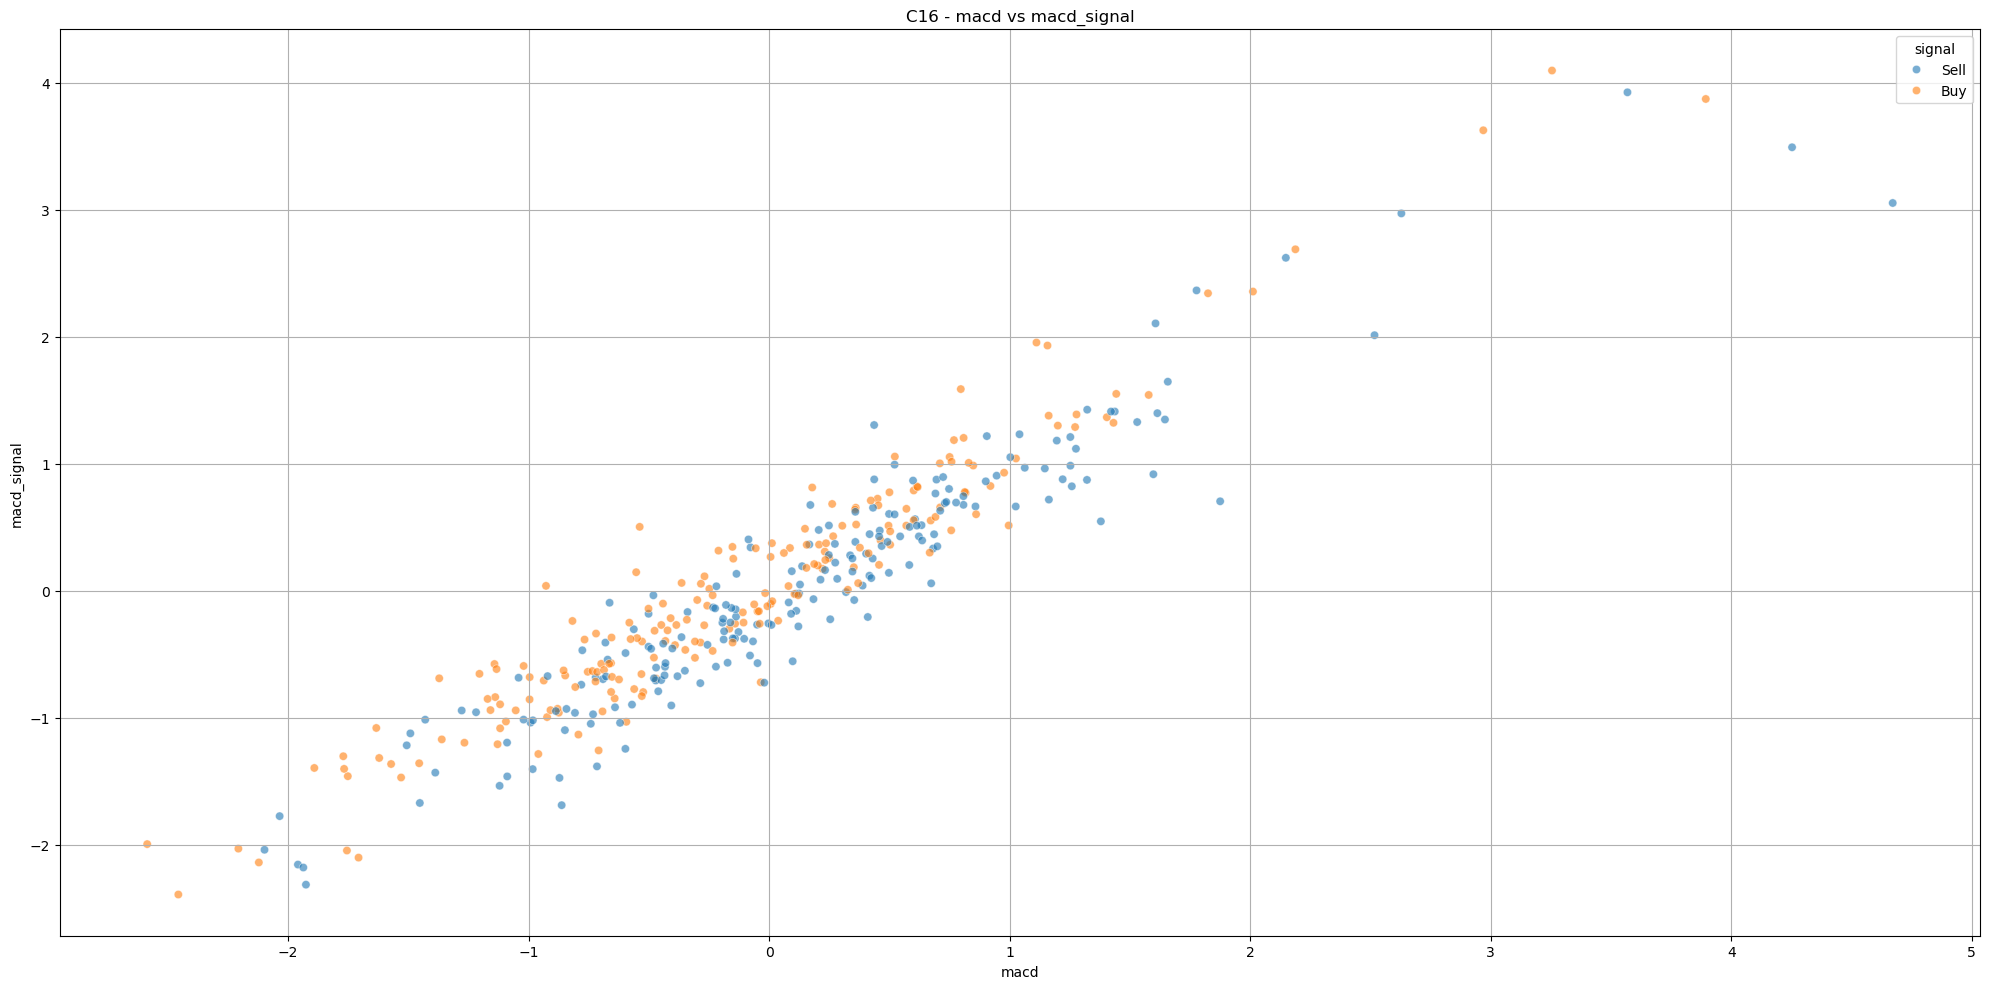

In [12]:
for combo_id, features in combos.items():
    data = df_scaled[features + ["signal"]].copy()
    data = data[data['signal'].isin(["Buy", "Sell"])]  # Œ¶ŒπŒªœÑœÅŒ¨œÅŒøœÖŒºŒµ ŒºœåŒΩŒø Buy/Sell
    print(f"\nüìä ŒüœÄœÑŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑ {combo_id}: {features}")

    if len(features) == 2:
        plt.figure(figsize=(20, 10))
        sns.scatterplot(data=data, x=features[0], y=features[1], hue="signal", alpha=0.6)
        plt.title(f"{combo_id} - {features[0]} vs {features[1]}")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    elif len(features) == 3:
        fig = plt.figure(figsize=(20, 10))
        ax = fig.add_subplot(111, projection='3d')
        for label in data['signal'].unique():
            subset = data[data['signal'] == label]
            ax.scatter(
                subset[features[0]],
                subset[features[1]],
                subset[features[2]],
                label=label, s=10, alpha=0.5
            )
        ax.set_xlabel(features[0])
        ax.set_ylabel(features[1])
        ax.set_zlabel(features[2])
        ax.set_title(f"{combo_id} - 3D Plot")
        ax.legend()
        plt.tight_layout()
        plt.show()

In [13]:
selected_combos = {
    "C10": ["bb_bandwidth", "rsi", "stoch_k"],
    "C11": ["macd_diff", "rsi", "atr"],
    "C12": ["stoch_k", "rsi", "<TICKVOL>"],
    "C13": ["macd_diff", "ema_50", "bb_bandwidth"],
    "C14": ["bb_upper", "rsi"],
    "C15": ["bb_lower", "rsi"],
    "C16": ["macd", "macd_signal"]
}

# ŒëœÄŒøŒ∏ŒÆŒ∫ŒµœÖœÉŒ∑ œÉŒµ Œ±œÅœáŒµŒØŒø json
with open("../data/selected_combos.json", "w") as f:
    json.dump(selected_combos, f, indent=4)

In [14]:
df.to_csv("../data/EURUSD_with_signals_with_indicators_and_combos", index=False)